📦 Loading patches ...
🧠 Loading trained model ...
🔁 Running reconstruction ...
🖼️ Plotting ...


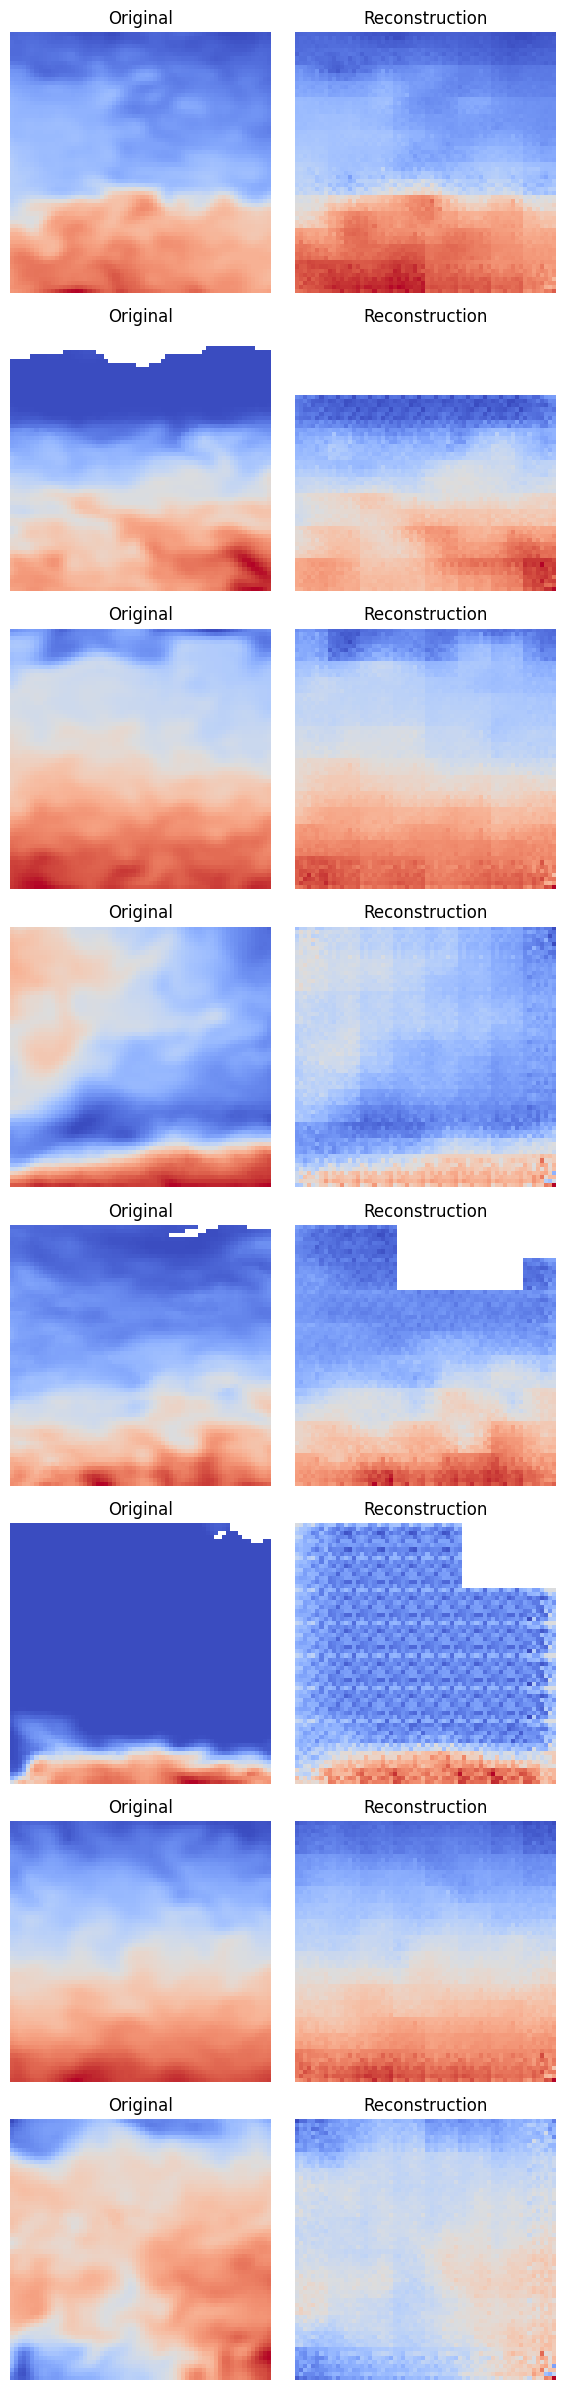

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import sys
from pathlib import Path

# Manually define project root (assumes notebook is in `notebooks/`)
project_root = Path("..").resolve()
sys.path.append(str(project_root / "src"))

from autoencoder import SSTAutoencoder

# Paths
data_path = project_root / "data/patches" / "sst_patches_64x64.npy"
model_path = project_root / "outputs" / "sst_autoencoder.pth"


# Load data
print("📦 Loading patches ...")
patches = np.load(data_path)
patches = patches[:8]  # Select a few samples to visualize
patches_tensor = torch.tensor(patches).unsqueeze(1).float()  # (N, 1, 64, 64)

# Load model
print("🧠 Loading trained model ...")
model = SSTAutoencoder()
model.load_state_dict(torch.load(model_path, map_location="cpu"))
model.eval()

# Reconstruct
print("🔁 Running reconstruction ...")
with torch.no_grad():
    recon = model(patches_tensor).squeeze(1).numpy()  # (N, 64, 64)

# Plot
print("🖼️ Plotting ...")
fig, axs = plt.subplots(8, 2, figsize=(6, 24))
for i in range(8):
    axs[i, 0].imshow(patches[i], cmap='coolwarm')
    axs[i, 0].set_title("Original")
    axs[i, 1].imshow(recon[i], cmap='coolwarm')
    axs[i, 1].set_title("Reconstruction")
    for ax in axs[i]: ax.axis('off')
plt.tight_layout()
plt.savefig(project_root / "results" / "figures" / "Reconstructions.png", dpi=300, bbox_inches="tight")
plt.show()
